# Avg-Weighted

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!gdown 'https://drive.google.com/uc?id=1-xdr4LtRuJETLfVzImRLVhTRTzxPwLFO'
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

Downloading...
From: https://drive.google.com/uc?id=1-xdr4LtRuJETLfVzImRLVhTRTzxPwLFO
To: /content/tmdb_5000_movies.csv
100% 5.70M/5.70M [00:00<00:00, 234MB/s]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Relevent data
# id, title, vote_average, vote_count, popularity
movie = movies[['id', 'title', 'vote_average', 'vote_count', 'popularity']]
movie.head()

,id,title,vote_average,vote_count,popularity
0,19995,Avatar,7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615
2,206647,Spectre,6.3,4466,107.376788
3,49026,The Dark Knight Rises,7.6,9106,112.312950
4,49529,John Carter,6.1,2124,43.926995


In [ ]:
movie.isnull().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
popularity,0


In [ ]:
movie.duplicated().sum()

0

In [ ]:
# Using weighted average for each movies's average rating
#  W = ( Rv + Cm ) / ( v + m )
# where W = weighted rating, R = average vote, v = vote count, m = minimum vote required, C = mean of total votes

v = movie['vote_count']
R = movie['vote_average']
C = movie['vote_average'].mean()
m = movie['vote_count'].quantile(0.70)

movie = movie.copy()

movie['weighted_avg'] = ((R*v) + (C*m))/(v+m)
movie.head()

,id,title,vote_average,vote_count,popularity,weighted_avg
0,19995,Avatar,7.2,11800,150.437577,7.148013
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627
2,206647,Spectre,6.3,4466,107.376788,6.276075
3,49026,The Dark Knight Rises,7.6,9106,112.312950,7.509565
4,49529,John Carter,6.1,2124,43.926995,6.098319


In [ ]:
movies_ranking = movie.sort_values('weighted_avg', ascending = False)
movies_ranking = movies_ranking[['title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity'	]]

In [ ]:
movies_ranking.head(20)

,title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


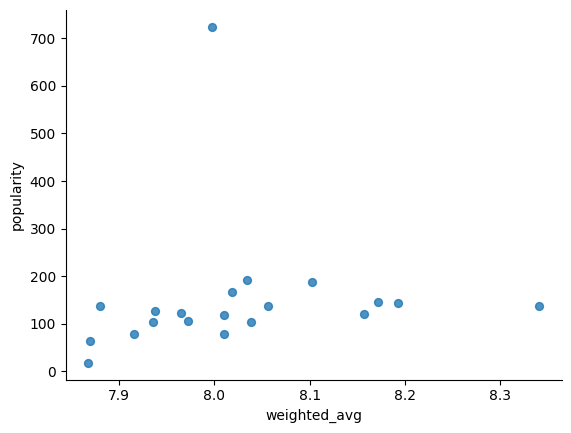

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='weighted_avg', y='popularity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

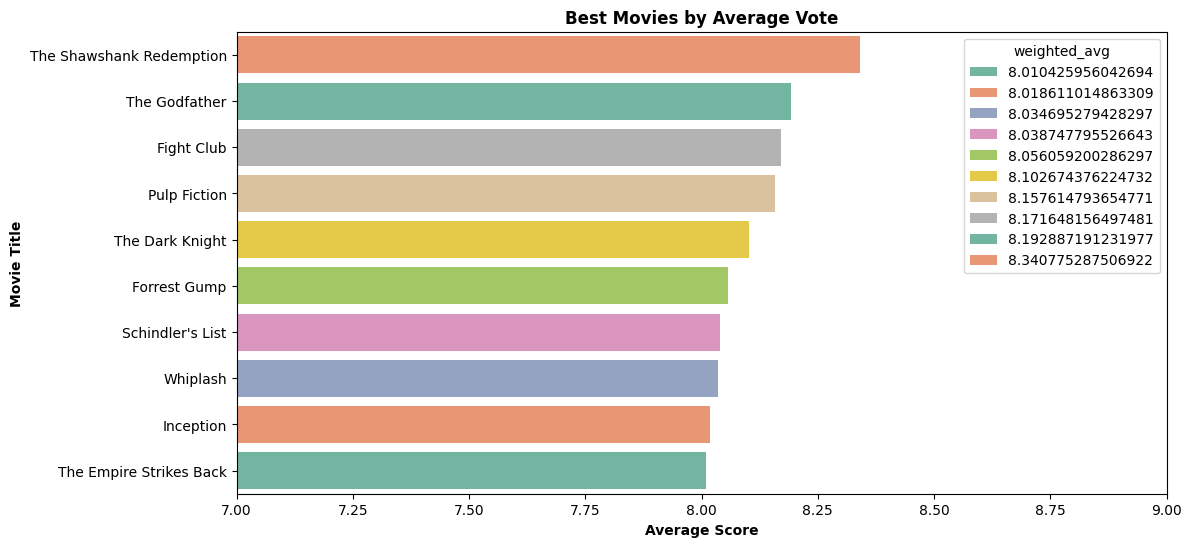

In [ ]:
weight_avg = movies_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(12, 6))

axis1 = sns.barplot(
    x=weight_avg['weighted_avg'].head(10),
    y=weight_avg['title'].head(10),
    hue=weight_avg['weighted_avg'].head(10),
    palette='Set2'
)

plt.xlim(7, 9)

plt.title('Best Movies by Average Vote', weight='bold')
plt.xlabel('Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('weighted_recommendation.png')


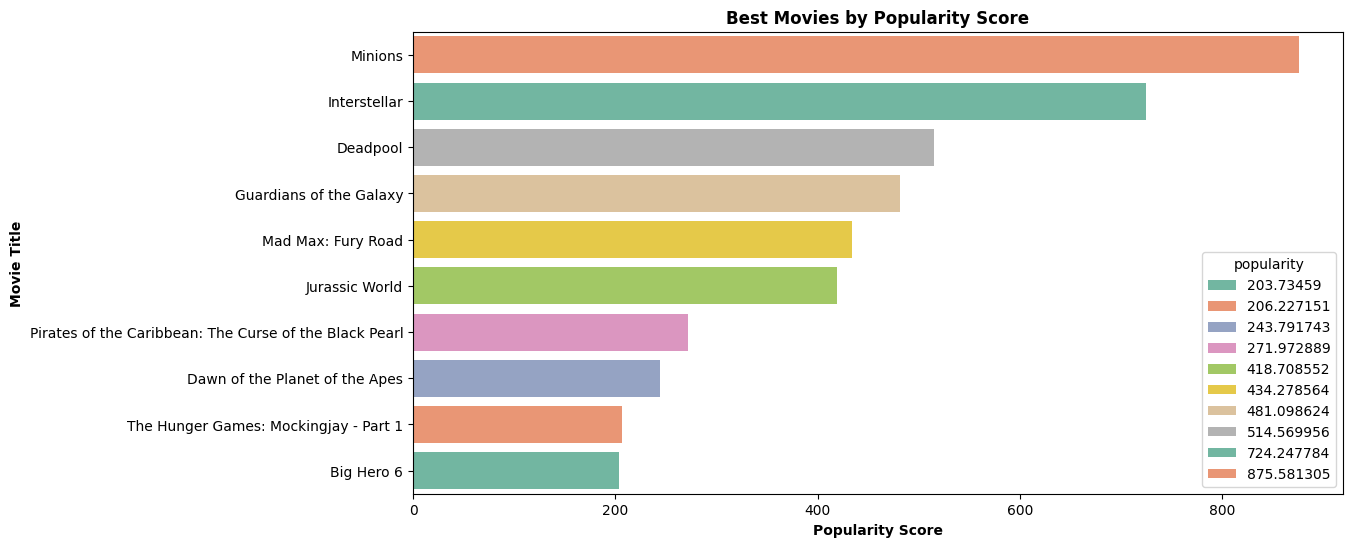

In [ ]:
weight_avg = movies_ranking.sort_values('popularity', ascending=False)
plt.figure(figsize=(12, 6))

axis1 = sns.barplot(
    x=weight_avg['popularity'].head(10),
    y=weight_avg['title'].head(10),
    hue=weight_avg['popularity'].head(10),
    palette='Set2'
)

plt.title('Best Movies by Popularity Score', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies_by_popularity.png')


In [ ]:
# Final reccomendation is based on 50% popularity + 50% weighted avg
# Appling Min-Max scaler

scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(movie[['weighted_avg', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns = ['weighted_avg', 'popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [ ]:
movie[['normalized_weighted_avg','normalized_popularity']] = movie_normalized

In [ ]:
movie.head()

,id,title,vote_average,vote_count,popularity,weighted_avg,normalized_weighted_avg,normalized_popularity
0,19995,Avatar,7.2,11800,150.437577,7.148013,0.674339,0.171815
1,285,Pirates of the Caribbean: At World's End,6.9,4500,139.082615,6.807627,0.581403,0.158846
2,206647,Spectre,6.3,4466,107.376788,6.276075,0.436273,0.122635
3,49026,The Dark Knight Rises,7.6,9106,112.312950,7.509565,0.773054,0.128272
4,49529,John Carter,6.1,2124,43.926995,6.098319,0.387739,0.050169


In [ ]:
movie.loc[:, 'score'] = movie['normalized_weighted_avg'] * 0.5 + movie['normalized_popularity'] * 0.5
movie_scored = movie.sort_values(['score'], ascending = False)
movie_scored[['title', 'normalized_weighted_avg', 'normalized_popularity', 'score']].head(10)

,title,normalized_weighted_avg,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


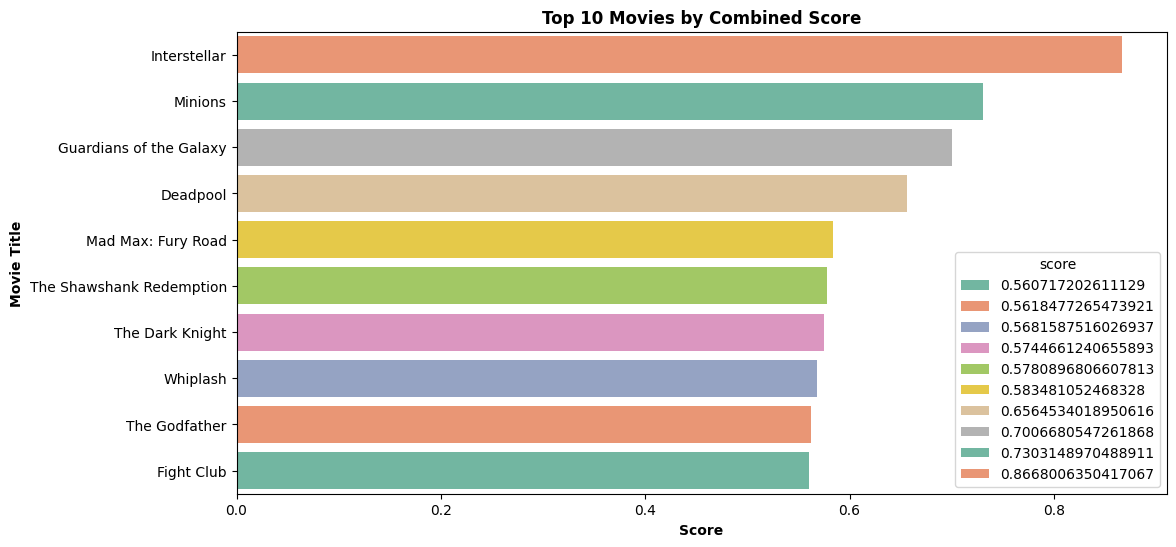

In [ ]:
score = movie_scored.sort_values('score', ascending=False)
plt.figure(figsize=(12, 6))

axis1 = sns.barplot(
    x=score['score'].head(10),
    y=score['title'].head(10),
    hue=score['score'].head(10),
    palette='Set2'
)

plt.title('Top 10 Movies by Combined Score', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('score_recommendation.png')